In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import paper_plotting


paper_plotting.set_figure_defaults()
warnings.filterwarnings("ignore")

In [2]:
nwb_copy_file_name = "j1620210710_.nwb"
interval_list_name = "runs_noPrePostTrialTimes raw data valid times"

In [3]:
import spyglass.spikesorting.v1 as sgs

sgs.SortGroup.set_group_by_shank(nwb_file_name=nwb_copy_file_name)

[2024-02-21 03:39:05,528][INFO]: Connecting edeno@lmf-db.cin.ucsf.edu:3306
[2024-02-21 03:39:05,568][INFO]: Connected edeno@lmf-db.cin.ucsf.edu:3306
[03:39:05][WARNING] Spyglass: Please update position_tools to >= 0.1.0


In [4]:
import pandas as pd

import spyglass.common as sgc

query = (
    (sgs.SortGroup.SortGroupElectrode & {"nwb_file_name": nwb_copy_file_name})
    * sgc.Electrode
    * sgc.BrainRegion
)

sort_group_to_brain_region = (
    pd.DataFrame(query)
    .groupby(["nwb_file_name", "sort_group_id"])
    .region_name.unique()
).apply(lambda x: x[0])

sort_group_to_brain_region

nwb_file_name     sort_group_id
j1620210710_.nwb  0                   hippocampus
                  1                   hippocampus
                  2                CorpusCallosum
                  3                   hippocampus
                  4                   hippocampus
                  5                   hippocampus
                  6                   hippocampus
                  7                   hippocampus
                  8                   hippocampus
                  9                   hippocampus
                  10                  hippocampus
                  11                  hippocampus
                  12               CorpusCallosum
                  13                  hippocampus
                  14                  hippocampus
                  15                  hippocampus
                  16                  hippocampus
                  17                  hippocampus
                  18                  hippocampus
                  

In [5]:
ca1_sort_group_ids = (
    sort_group_to_brain_region.loc[sort_group_to_brain_region == "hippocampus"]
    .index.get_level_values("sort_group_id")
    .to_numpy()
)

ca1_sort_group_ids

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23])

In [6]:
import spyglass.spikesorting.v1 as sgs

sgs.SpikeSortingPreprocessingParameters().insert1(
    {
        "preproc_param_name": "franklab_tetrode_hippocampus",
        "preproc_params": {
            "frequency_min": 600,
            "frequency_max": 6000,
            "margin_ms": 5,
            "seed": 0,
            "min_segment_length": 0.0015,
        },
    },
    skip_duplicates=True,
)

In [7]:
group_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": interval_list_name,
    "preproc_param_name": "franklab_tetrode_hippocampus",
    "team_name": "Alison Comrie",
}
selection_keys = []
for sort_group_id in ca1_sort_group_ids:
    key = {
        **group_key,
        "sort_group_id": sort_group_id,
    }
    sgs.SpikeSortingRecordingSelection.insert_selection(key)
    selection_keys.append(key)

sgs.SpikeSortingRecording.populate(
    (sgs.SpikeSortingRecordingSelection & selection_keys).fetch("KEY"),
    processes=None,
    display_progress=True,
)

[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already in

In [8]:
recording_ids = (
    sgs.SpikeSortingRecordingSelection & {"nwb_file_name": nwb_copy_file_name}
).fetch("recording_id")

artifact_selection_keys = []

for recording_id in recording_ids:
    key = {
        "recording_id": recording_id,
        "artifact_param_name": "none",
    }
    artifact_selection_keys.append(
        sgs.ArtifactDetectionSelection.insert_selection(key)[0]
    )

sgs.ArtifactDetection.populate(
    (sgs.ArtifactDetectionSelection & artifact_selection_keys).fetch("KEY"),
    processes=None,
    display_progress=True,
)

[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already inserted.
[03:39:08][WARNING] Spyglass: Similar row(s) already in

In [9]:
spikesorting_selection_keys = []
for artifact_select_key in artifact_selection_keys:
    key = {
        "recording_id": str(artifact_select_key["recording_id"]),
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
        "nwb_file_name": nwb_copy_file_name,
        "interval_list_name": str(artifact_select_key["artifact_id"]),
    }
    sgs.SpikeSortingSelection.insert_selection(key)
    spikesorting_selection_keys.append(key)

sgs.SpikeSorting.populate(
    (sgs.SpikeSortingSelection & spikesorting_selection_keys).fetch("KEY"),
    processes=None,
    display_progress=True,
)

[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s) already inserted.
[03:39:08][INFO] Spyglass: Similar row(s

In [10]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput

sorting_ids = (
    sgs.SpikeSortingSelection & {"nwb_file_name": nwb_copy_file_name}
).fetch("sorting_id")

for sorting_id in sorting_ids:
    try:
        sgs.CurationV1.insert_curation(sorting_id=sorting_id)
    except KeyError as e:
        pass

SpikeSortingOutput.insert(
    sgs.CurationV1().fetch("KEY"),
    part_name="CurationV1",
    skip_duplicates=True,
)

In [11]:
from spyglass.decoding.v1.waveform_features import WaveformFeaturesParams

WaveformFeaturesParams()

features_param_name a name for this set of parameters,params the parameters for the waveform features
amplitude,=BLOB=
"amplitude, spike_location",=BLOB=


In [12]:
from spyglass.decoding.v1.waveform_features import UnitWaveformFeaturesSelection

UnitWaveformFeaturesSelection()

spikesorting_merge_id,features_param_name a name for this set of parameters
0164f4ef-8f78-c9a7-d50e-72c699bbbffc,amplitude
09019431-f934-bf05-82d4-66706049043a,amplitude
16a99d71-4d6d-a857-4b4c-2d7d00cb24c7,amplitude
1d3357b8-aa81-109a-fa92-72b43ddca618,amplitude
1d48bf84-3a81-5d06-c3f0-28edae770348,amplitude
2725a5cb-8ec3-8756-f700-cb22aef53d3f,amplitude
33d71671-63e5-0d99-0504-43d9e26ab064,amplitude
3bd88769-9b39-4d1a-4bda-b50be1c2956b,amplitude
3c7ee428-b12b-3a7d-13a7-f84f138dc511,amplitude
435fe99a-a1f5-2d93-ea98-a0bc5bf88ae5,amplitude


In [13]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput

merge_ids = (
    (SpikeSortingOutput.CurationV1 * sgs.SpikeSortingSelection)
    & {
        "nwb_file_name": nwb_copy_file_name,
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
    }
).fetch("merge_id")
merge_ids

array([UUID('d76584f8-0969-d6e1-cc10-d59dc465bbdf'),
       UUID('33d71671-63e5-0d99-0504-43d9e26ab064'),
       UUID('dfa87e8e-c5cf-95f8-ab58-7ea5605d3630'),
       UUID('a6cc0a23-7e29-6d56-e4c6-14185bcea85a'),
       UUID('5ae79d97-6a99-c4bf-204f-37bacb4c76a9'),
       UUID('869072e1-76d6-e200-2e68-93e55c5c93e5'),
       UUID('a0771d6c-fc9d-f6bc-2d9d-3502fbd01d57'),
       UUID('ed70dacb-a637-6b32-6eac-139a5dc5f7c5'),
       UUID('df51df7a-ab08-fbe1-a880-cb3ebd3fb983'),
       UUID('f52e988b-ff2c-732c-b98a-4df28677c57c'),
       UUID('16a99d71-4d6d-a857-4b4c-2d7d00cb24c7'),
       UUID('3c7ee428-b12b-3a7d-13a7-f84f138dc511'),
       UUID('1d48bf84-3a81-5d06-c3f0-28edae770348'),
       UUID('fd294787-0225-683f-54a6-f97c502e7b52'),
       UUID('3bd88769-9b39-4d1a-4bda-b50be1c2956b'),
       UUID('0164f4ef-8f78-c9a7-d50e-72c699bbbffc'),
       UUID('4845e1c1-4579-c9b7-2299-12165edeeabf'),
       UUID('58784fb4-44cf-5957-6ac7-1def86583c22'),
       UUID('800f080a-6da0-670e-87df-fac918545

In [14]:
selection_keys = [
    {
        "spikesorting_merge_id": merge_id,
        "features_param_name": "amplitude",
    }
    for merge_id in merge_ids
]
UnitWaveformFeaturesSelection.insert(selection_keys, skip_duplicates=True)

UnitWaveformFeaturesSelection & selection_keys

spikesorting_merge_id,features_param_name a name for this set of parameters
0164f4ef-8f78-c9a7-d50e-72c699bbbffc,amplitude
09019431-f934-bf05-82d4-66706049043a,amplitude
16a99d71-4d6d-a857-4b4c-2d7d00cb24c7,amplitude
1d48bf84-3a81-5d06-c3f0-28edae770348,amplitude
33d71671-63e5-0d99-0504-43d9e26ab064,amplitude
3bd88769-9b39-4d1a-4bda-b50be1c2956b,amplitude
3c7ee428-b12b-3a7d-13a7-f84f138dc511,amplitude
4845e1c1-4579-c9b7-2299-12165edeeabf,amplitude
5712ba0d-331e-1f99-2c45-f9256730e6e5,amplitude
58784fb4-44cf-5957-6ac7-1def86583c22,amplitude


In [15]:
from spyglass.decoding.v1.waveform_features import UnitWaveformFeatures

UnitWaveformFeatures.populate(selection_keys)

In [16]:
from spyglass.decoding.v1.clusterless import UnitWaveformFeaturesGroup

UnitWaveformFeaturesGroup().create_group(
    nwb_file_name=nwb_copy_file_name,
    group_name="test_group",
    keys=selection_keys,
)
UnitWaveformFeaturesGroup & {"waveform_features_group_name": "test_group"}

nwb_file_name name of the NWB file,waveform_features_group_name
CH65_20211201_.nwb,test_group
j1620210710_.nwb,test_group


In [17]:
UnitWaveformFeaturesGroup.UnitFeatures & {
    "waveform_features_group_name": "test_group"
}

nwb_file_name name of the NWB file,waveform_features_group_name,spikesorting_merge_id,features_param_name a name for this set of parameters
CH65_20211201_.nwb,test_group,0164f4ef-8f78-c9a7-d50e-72c699bbbffc,amplitude
j1620210710_.nwb,test_group,0164f4ef-8f78-c9a7-d50e-72c699bbbffc,amplitude
CH65_20211201_.nwb,test_group,09019431-f934-bf05-82d4-66706049043a,amplitude
j1620210710_.nwb,test_group,09019431-f934-bf05-82d4-66706049043a,amplitude
CH65_20211201_.nwb,test_group,16a99d71-4d6d-a857-4b4c-2d7d00cb24c7,amplitude
j1620210710_.nwb,test_group,16a99d71-4d6d-a857-4b4c-2d7d00cb24c7,amplitude
CH65_20211201_.nwb,test_group,1d48bf84-3a81-5d06-c3f0-28edae770348,amplitude
j1620210710_.nwb,test_group,1d48bf84-3a81-5d06-c3f0-28edae770348,amplitude
CH65_20211201_.nwb,test_group,33d71671-63e5-0d99-0504-43d9e26ab064,amplitude
j1620210710_.nwb,test_group,33d71671-63e5-0d99-0504-43d9e26ab064,amplitude


In [18]:
import spyglass.position as sgp

sgp.v1.TrodesPosParams()

trodes_pos_params_name name for this set of parameters,params
default,=BLOB=
default_decoding,=BLOB=
default_led0,=BLOB=
max-sep_80,=BLOB=
single_led,=BLOB=
single_led_decoding,=BLOB=
single_led_upsampled,=BLOB=
upsample_1000_Hz,=BLOB=


In [19]:
sgp.v1.TrodesPosParams().insert1(
    {
        "trodes_pos_params_name": "default_decoding",
        "params": {
            "max_separation": 9.0,
            "max_speed": 300.0,
            "position_smoothing_duration": 0.125,
            "speed_smoothing_std_dev": 0.1,
            "head_orient_smoothing_std_dev": 0.001,
            "led1_is_front": 1,
            "is_upsampled": 1,
            "upsampling_sampling_rate": 500.0,
            "upsampling_interpolation_method": "linear",
        },
    },
    skip_duplicates=True,
)

(
    sgp.v1.TrodesPosParams() & {"trodes_pos_params_name": "default_decoding"}
).fetch1("params")

{'max_separation': 9.0,
 'max_speed': 300.0,
 'position_smoothing_duration': 0.125,
 'speed_smoothing_std_dev': 0.1,
 'head_orient_smoothing_std_dev': 0.001,
 'led1_is_front': 1,
 'is_upsampled': 1,
 'upsampling_sampling_rate': 500.0,
 'upsampling_interpolation_method': 'linear'}

In [20]:
trodes_s_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": "pos 5 valid times",
    "position_info_param_name": "default_decoding",
}
# sgp.v1.TrodesPosSelection.insert1(
#     trodes_s_key,
#     skip_duplicates=True,
# )

# sgp.v1.TrodesPosV1.populate(trodes_s_key)

# sgp.v1.TrodesPosV1 & trodes_s_key

In [21]:
sgp.PositionOutput.CommonPos & trodes_s_key

merge_id,position_info_param_name name for this set of parameters,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list
122c6d0f-47e2-8e9f-bce6-6408cb7b2d6d,default_decoding,j1620210710_.nwb,pos 5 valid times


In [22]:
from spyglass.decoding.v1.core import PositionGroup

position_merge_ids = (sgp.PositionOutput.CommonPos & trodes_s_key).fetch(
    "merge_id"
)

PositionGroup().create_group(
    nwb_file_name=nwb_copy_file_name,
    group_name="test_group",
    keys=[{"pos_merge_id": merge_id} for merge_id in position_merge_ids],
    position_variables=["head_position_x", "head_position_y"],
)

PositionGroup & {
    "nwb_file_name": nwb_copy_file_name,
    "position_group_name": "test_group",
}

nwb_file_name name of the NWB file,position_group_name,position_variables list of position variables to decode
j1620210710_.nwb,test_group,=BLOB=


In [23]:
(
    PositionGroup.Position
    & {
        "nwb_file_name": nwb_copy_file_name,
        "position_group_name": "test_group",
    }
)

nwb_file_name name of the NWB file,position_group_name,pos_merge_id
j1620210710_.nwb,test_group,122c6d0f-47e2-8e9f-bce6-6408cb7b2d6d


In [24]:
pos_merge_id = (
    PositionGroup.Position
    & {
        "nwb_file_name": nwb_copy_file_name,
        "position_group_name": "test_group",
    }
).fetch1("pos_merge_id")

sgp.PositionOutput & {"merge_id": pos_merge_id}

merge_id,source
122c6d0f-47e2-8e9f-bce6-6408cb7b2d6d,CommonPos


In [25]:
from spyglass.linearization.v0.main import TrackGraph
from spyglass.linearization.v0.main import IntervalLinearizedPosition

linearization_key = {
    "position_info_param_name": "default_decoding",
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": trodes_s_key["interval_list_name"],
    "linearization_param_name": "default",
}


track_graph_name = (IntervalLinearizedPosition() & linearization_key).fetch1(
    "track_graph_name"
)
track_graph = (
    TrackGraph() & {"track_graph_name": track_graph_name}
).get_networkx_track_graph()
track_graph_params = (
    TrackGraph() & {"track_graph_name": track_graph_name}
).fetch1()

track_graph, track_graph_params

(<networkx.classes.graph.Graph at 0x7f675c5d8b50>,
 {'track_graph_name': 'j1620210706',
  'environment': 'spatial_bandit',
  'node_positions': array([[179.4527997 ,  45.06356539],
         [225.71560744, 123.25220539],
         [184.17870421, 205.02047636],
         [ 88.93641002, 209.70195249],
         [ 37.85507841, 128.45589571],
         [ 88.19751712,  45.06356539],
         [179.63427582,  99.71153958],
         [135.43811066, 180.45759636],
         [ 87.45862421,  99.55227765],
         [135.5973726 , 127.33183636]]),
  'edges': array([[9, 6],
         [6, 0],
         [6, 1],
         [9, 7],
         [7, 2],
         [7, 3],
         [9, 8],
         [8, 4],
         [8, 5]]),
  'linear_edge_order': [(9, 6),
   (6, 0),
   (6, 1),
   (9, 7),
   (7, 2),
   (7, 3),
   (9, 8),
   (8, 4),
   (8, 5)],
  'linear_edge_spacing': 15,
  'linear_edge_specialty': None,
  'edge_map': None})

In [26]:
from spyglass.decoding.v1.core import DecodingParameters
from non_local_detector import ContFragClusterlessClassifier
from non_local_detector.environment import Environment

decoding_param_name = (
    nwb_copy_file_name.strip("_.nwb") + "_contfrag_clusterless_1D"
)
decoding_params = ContFragClusterlessClassifier(
    environments=Environment(
        place_bin_size=2.0,
        track_graph=track_graph,
        edge_order=track_graph_params["linear_edge_order"],
        edge_spacing=track_graph_params["linear_edge_spacing"],
    )
)

DecodingParameters.insert1(
    {
        "decoding_param_name": decoding_param_name,
        "decoding_params": decoding_params,
    },
    skip_duplicates=True,
)

(DecodingParameters & {"decoding_param_name": decoding_param_name}).fetch1()

{'decoding_param_name': 'j1620210710_contfrag_clusterless_1D',
 'decoding_params': {'discrete_initial_conditions': array([0.5, 0.5]),
  'continuous_initial_conditions_types': [UniformInitialConditions(),
   UniformInitialConditions()],
  'discrete_transition_concentration': 1.1,
  'discrete_transition_stickiness': array([0., 0.]),
  'discrete_transition_regularization': 1e-10,
  'discrete_transition_type': DiscreteStationaryDiagonal(diagonal_values=array([0.98, 0.98])),
  'continuous_transition_types': [[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0, use_manifold_distance=False, direction=None),
    Uniform(environment_name='', environment2_name=None)],
   [Uniform(environment_name='', environment2_name=None),
    Uniform(environment_name='', environment2_name=None)]],
  'environments': [Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f675c52e9a0>, edge_order=[(9, 6), (6, 0), (6, 1), (9, 7), (7, 2), (7, 3

In [27]:
from spyglass.decoding.v1.clusterless import ClusterlessDecodingSelection

ClusterlessDecodingSelection()

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
j1620210710_.nwb,test_group,test_group,contfrag_clusterless_0.5.13,06_r3 noPrePostTrialTimes,06_r3 noPrePostTrialTimes,1
CH65_20211125_.nwb,ch65_group_25_tet3,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,1
CH65_20211127_.nwb,CH65_20211127__50to64_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,0
CH65_20211127_.nwb,CH65_20211127__7tets_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,0
CH65_20211127_.nwb,CH65_20211127__alltets_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,1
CH65_20211127_.nwb,CH65_20211127__mod1tets_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,0
CH65_20211127_.nwb,CH65_20211127__mod1tets_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,1
CH65_20211127_.nwb,CH65_20211127__modtets_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,1
CH65_20211201_.nwb,scn2a_group,pos 0 valid times,contfrag_clusterless_6track,pos 0 valid times,raw data valid times,1
CH65_20211201_.nwb,scn2a_group,pos 0 valid times,contfrag_clusterless_6track,raw data valid times,raw data valid times,1


In [28]:
selection_key = {
    "waveform_features_group_name": "test_group",
    "position_group_name": "test_group",
    "decoding_param_name": decoding_param_name,
    "nwb_file_name": nwb_copy_file_name,
    "encoding_interval": "06_r3 noPrePostTrialTimes",
    "decoding_interval": "06_r3 noPrePostTrialTimes",
    "estimate_decoding_params": True,
}

ClusterlessDecodingSelection.insert1(
    selection_key,
    skip_duplicates=True,
)

ClusterlessDecodingSelection & selection_key

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
j1620210710_.nwb,test_group,test_group,j1620210710_contfrag_clusterless_1D,06_r3 noPrePostTrialTimes,06_r3 noPrePostTrialTimes,1


In [29]:
import jax

device_id = 4
device = jax.devices()[device_id]
jax.config.update("jax_default_device", device)
device

2024-02-21 03:39:14.888260: W external/xla/xla/pjrt/gpu/gpu_helpers.cc:63] Unable to enable peer access between GPUs 0 and 9; status: INTERNAL: failed to enable peer access from 0x7f6390625130 to 0x7f6388624e00: CUDA_ERROR_TOO_MANY_PEERS: peer mapping resources exhausted
2024-02-21 03:39:14.896895: W external/xla/xla/pjrt/gpu/gpu_helpers.cc:63] Unable to enable peer access between GPUs 1 and 9; status: INTERNAL: failed to enable peer access from 0x7f63a46249b0 to 0x7f6388624e00: CUDA_ERROR_TOO_MANY_PEERS: peer mapping resources exhausted
2024-02-21 03:39:14.904359: W external/xla/xla/pjrt/gpu/gpu_helpers.cc:63] Unable to enable peer access between GPUs 2 and 9; status: INTERNAL: failed to enable peer access from 0x7f63a8638920 to 0x7f6388624e00: CUDA_ERROR_TOO_MANY_PEERS: peer mapping resources exhausted
2024-02-21 03:39:14.910487: W external/xla/xla/pjrt/gpu/gpu_helpers.cc:63] Unable to enable peer access between GPUs 3 and 9; status: INTERNAL: failed to enable peer access from 0x7f63

gpu(id=4)

In [30]:
from spyglass.decoding.v1.clusterless import ClusterlessDecodingV1

ClusterlessDecodingV1.populate(selection_key, processes=None)

In [31]:
ClusterlessDecodingV1()

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
j1620210710_.nwb,test_group,test_group,j1620210710_contfrag_clusterless_1D,06_r3 noPrePostTrialTimes,06_r3 noPrePostTrialTimes,1,=BLOB=,=BLOB=


In [32]:
from spyglass.decoding import DecodingOutput

DecodingOutput.ClusterlessDecodingV1 & {"source": "ClusterlessDecodingV1"}

merge_id,nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
562ce95d-cfef-f323-98d1-25b2979a4194,j1620210710_.nwb,test_group,test_group,j1620210710_contfrag_clusterless_1D,06_r3 noPrePostTrialTimes,06_r3 noPrePostTrialTimes,1


In [33]:
decoding_merge_id = (
    DecodingOutput.ClusterlessDecodingV1() & selection_key
).fetch1("merge_id")
decoding_merge_id

UUID('562ce95d-cfef-f323-98d1-25b2979a4194')

In [34]:
results = (ClusterlessDecodingV1 & selection_key).fetch_results()
posterior = results.acausal_posterior.unstack("state_bins").sum("state")
posterior

[2024-02-21 03:39:15,275][WARNING]: Skipped checksum for file with hash: c1f07c91-22b5-11ca-96a3-69b15c940fca, and path: /stelmo/nwb/analysis/j1620210710/j1620210710_02c8ebb2-364c-4449-8ffc-b620dd299677.nc


<xarray.DataArray 'acausal_posterior' (time: 645774, position: 256)>
array([[1.5081608e-02, 8.1288619e-03, 2.6869446e-03, ..., 3.9934879e-08,
        3.4252192e-08, 3.0467323e-08],
       [1.6225379e-02, 6.8752714e-03, 2.3538719e-03, ..., 7.2033066e-07,
        7.0499777e-07, 6.9280605e-07],
       [1.9603141e-02, 6.3230838e-03, 1.6325347e-03, ..., 7.6887261e-07,
        7.7699173e-07, 7.8228470e-07],
       ...,
       [3.7713917e-06, 3.8558956e-06, 3.9532647e-06, ..., 3.8567655e-06,
        3.7497348e-06, 3.4330642e-06],
       [2.9705802e-06, 2.9894040e-06, 3.1459258e-06, ..., 1.6900225e-06,
        1.5486914e-06, 1.1995833e-06],
       [4.2631773e-06, 4.4217677e-06, 4.6608329e-06, ..., 7.1959685e-06,
        7.1251761e-06, 6.8226291e-06]], dtype=float32)
Coordinates:
  * position  (position) float64 0.9997 2.999 4.998 6.998 ... 603.6 605.6 607.5
  * time      (time) float64 1.626e+09 1.626e+09 ... 1.626e+09 1.626e+09

In [35]:
multiunit_rate = ClusterlessDecodingV1.get_firing_rate(
    selection_key, results.time.values, multiunit=True
).squeeze()

In [36]:
linear_position_info = ClusterlessDecodingV1.fetch_linear_position_info(
    selection_key
)

In [37]:
classifier = (ClusterlessDecodingV1 & selection_key).fetch_model()

[2024-02-21 03:39:35,624][WARNING]: Skipped checksum for file with hash: 394762c1-f049-c73f-e69c-9034a60610b3, and path: /stelmo/nwb/analysis/j1620210710/j1620210710_02c8ebb2-364c-4449-8ffc-b620dd299677.pkl


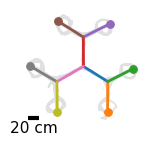

In [38]:
import matplotlib.cm as cm

reward_well_nodes = np.arange(6)
edge_colors = np.array(cm.get_cmap("tab10").colors)

paper_plotting.plot_2D_track_graph(
    track_graph=track_graph,
    position_info=linear_position_info,
    edge_order=track_graph_params["linear_edge_order"],
    reward_well_nodes=reward_well_nodes,
    edge_colors=edge_colors,
    position_names=("head_position_x", "head_position_y"),
)
paper_plotting.save_figure("figure5_frank_track")

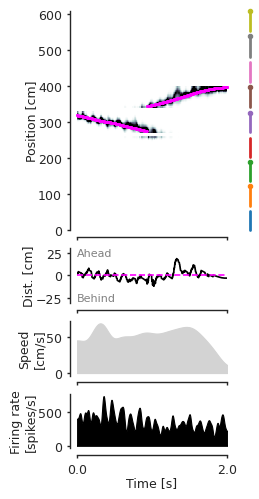

In [40]:
time_slice_ind = slice(212_500, 213_500)

paper_plotting.plot_decode(
    time_slice_ind=time_slice_ind,
    posterior=posterior,
    results=results,
    classifier=classifier,
    linear_position_info=linear_position_info,
    multiunit_rate=multiunit_rate,
    track_graph=track_graph,
    edge_spacing=track_graph_params["linear_edge_spacing"],
    edge_order=track_graph_params["linear_edge_order"],
    reward_well_nodes=reward_well_nodes,
    edge_colors=edge_colors,
)
paper_plotting.save_figure("figure5_frank_decode")

In [57]:
paper_plotting.create_1D_interactive_figurl(
    linear_position_info,
    posterior,
    results,
    multiunit_rate,
    label="j1620210710_clusterless_decode",
    view_height=800,
    speed_name="head_speed",
)

'https://figurl.org/f?v=gs://figurl/spikesortingview-10&d=sha1://74d41c37d558b1927e568aa0239a3186b91859bc&label=j1620210710_clusterless_decode&zone=franklab.default'